<img src="logo.jpg" />

## [Pedram Jahangiry, Fall 2019](www.pedramjahangiry.com) 

# Decision Trees, Bagging and Random Forests

* Trees can be used for regression and classification. 
* Trees are non linear models. 

# 1. Decision Trees Regression:

Importing the packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv("wage.csv")

In [4]:
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,769000.0,40,93,12,11,2,31,1,0,8.0,8.0
1,808000.0,50,119,18,11,16,37,1,0,14.0,14.0
2,825000.0,40,108,14,11,9,33,1,0,14.0,14.0
3,650000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,562000.0,40,74,11,14,5,34,1,0,6.0,11.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wage,935.0,957945.454545,404360.822474,115000.0,669000.0,905000.0,1160000.0,3078000.0
hours,935.0,43.929412,7.224256,20.0,40.0,40.0,48.0,80.0
IQ,935.0,101.282353,15.052636,50.0,92.0,102.0,112.0,145.0
educ,935.0,13.468449,2.196654,9.0,12.0,12.0,16.0,18.0
exper,935.0,11.563636,4.374586,1.0,8.0,11.0,15.0,23.0
tenure,935.0,7.234225,5.075206,0.0,3.0,7.0,11.0,22.0
age,935.0,33.080214,3.107803,28.0,30.0,33.0,36.0,38.0
married,935.0,0.893048,0.309217,0.0,1.0,1.0,1.0,1.0
black,935.0,0.128342,0.334650,0.0,0.0,0.0,0.0,1.0
meduc,857.0,10.682614,2.849756,0.0,8.0,12.0,12.0,18.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null int64
black      935 non-null int64
meduc      857 non-null float64
feduc      741 non-null float64
dtypes: float64(3), int64(8)
memory usage: 80.4 KB


## Data preprocessing 

In [7]:
df.isna().sum()  

wage         0
hours        0
IQ           0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
meduc       78
feduc      194
dtype: int64

In [8]:
df.drop('feduc', axis=1, inplace=True)

In [9]:
df['meduc'].fillna(df['meduc'].median(),axis=0, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null int64
black      935 non-null int64
meduc      935 non-null float64
dtypes: float64(2), int64(8)
memory usage: 73.1 KB


In [10]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

### Defining the variables and splitting the data

In [11]:
y = df['wage']
X = df.drop('wage', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [12]:
X_train.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc
932,45,77,12,12,10,28,1,1,7.0
82,40,96,11,15,3,37,1,0,8.0
370,40,123,17,14,7,38,1,0,12.0
452,40,109,12,14,1,36,1,0,9.0
132,40,97,12,10,4,31,1,0,12.0


## Scaling the features: 


for trees and random forests, the features are automatically scaled! 

###  Tree Regression with Sklearn

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
# Fitting Tree regression to the Training set (we go with the defualt params)
Tree_regressor = DecisionTreeRegressor()
Tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [15]:
# Predicting the Test set results
y_pred_test = Tree_regressor.predict(X_test)

In [16]:
predictions = pd.DataFrame({ 'y_actual_test':y_test,'y_pred_test':y_pred_test, 'resid':y_test - y_pred_test})
predictions.head()

,y_actual_test,y_pred_test,resid
434,975000.0,660000.0,315000.0
238,1730000.0,1384000.0,346000.0
531,675000.0,693000.0,-18000.0
157,1899000.0,635000.0,1264000.0
601,1500000.0,1602000.0,-102000.0


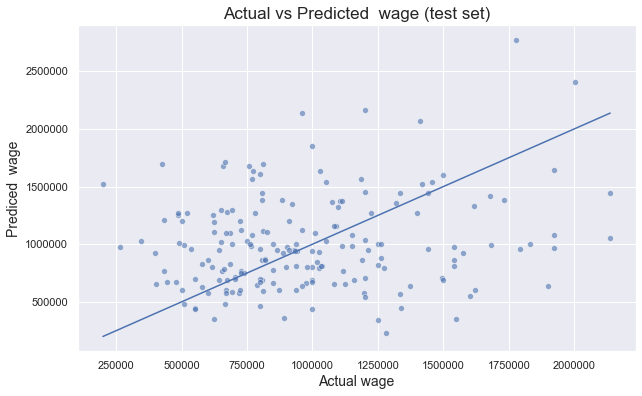

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

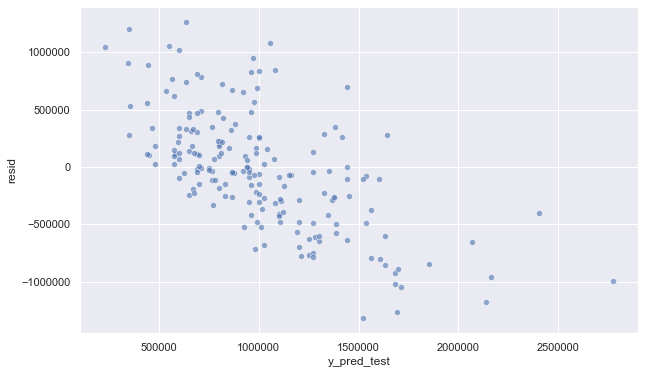

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='y_pred_test', y='resid' ,data=predictions, alpha=0.6)
plt.show()


### evaluating the model on test dataset

In [19]:
MSE_test = round(np.mean(np.square(y_test - y_pred_test)),2)
MSE_test

255844080213.9

In [20]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

505810.32

## Visualizing the Tree

Let's visualize one simple tree with two features only. 

In [44]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [22]:
X_train.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc
932,45,77,12,12,10,28,1,1,7.0
82,40,96,11,15,3,37,1,0,8.0
370,40,123,17,14,7,38,1,0,12.0
452,40,109,12,14,1,36,1,0,9.0
132,40,97,12,10,4,31,1,0,12.0


In [23]:
temp = pd.DataFrame(X_train[['IQ', 'exper']])
temp['wage']=y_train
temp.head()

,IQ,exper,wage
932,77,12,538000.0
82,96,15,1200000.0
370,123,14,1442000.0
452,109,14,350000.0
132,97,10,1200000.0


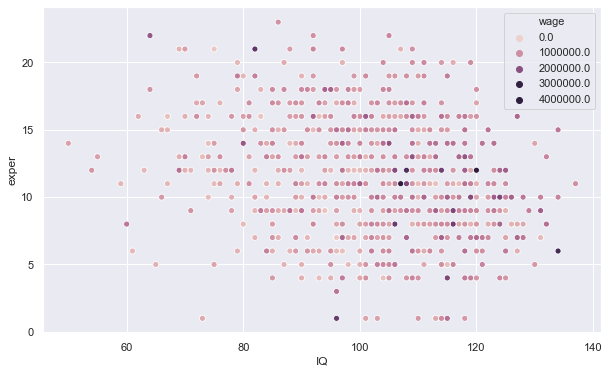

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='IQ', y='exper', data=temp, hue='wage')

In [25]:
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(temp.drop('wage', axis=1), temp['wage'])
predict = dtree.predict(X_test[['IQ', 'exper']])
features= list(temp.columns[:-1])
features

['IQ', 'exper']

In [26]:
dtree

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

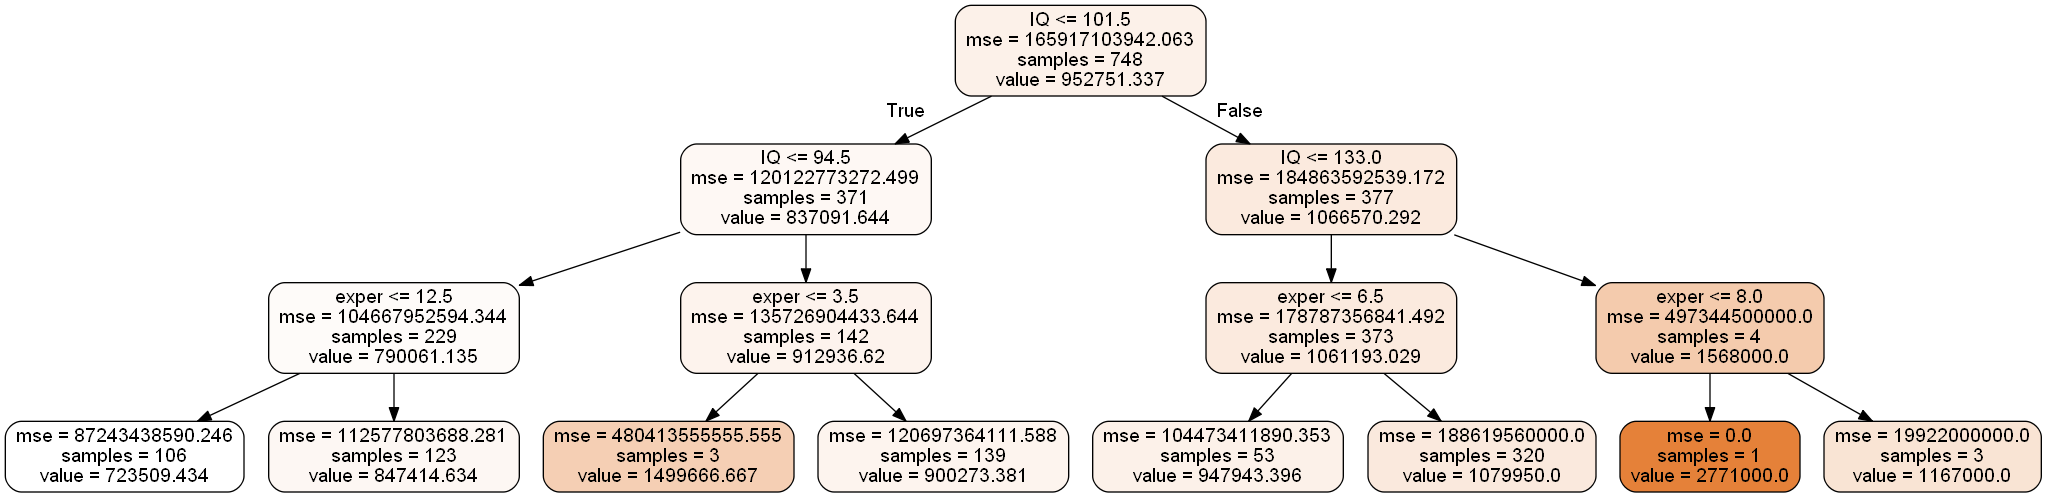

In [27]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True,rounded=True)
Tree = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(Tree[0].create_png())

In [28]:
# You can also save it as PDF
Tree[0].write_pdf("Tree.pdf")

### Do you want to see the regression line as well?

Let's try a tree regression with one feature only (say 'educ')

In [29]:
dtree= DecisionTreeRegressor(max_depth=1)
dtree.fit(X_train[['educ']], y_train)
wage_hat = dtree.predict(X_test[['educ']])

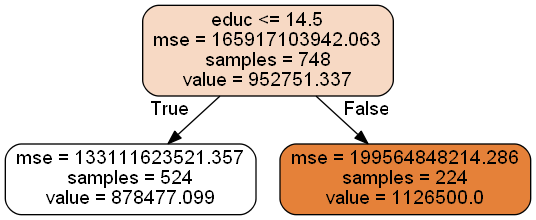

In [30]:
# visualizing the tree
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=['educ'], filled=True,rounded=True)
Tree = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(Tree[0].create_png())

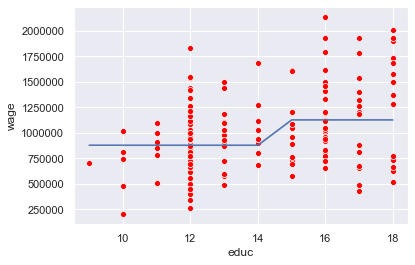

In [31]:
# visualizing the regression line
sns.scatterplot(X_test['educ'], y_test, color='red')
sns.lineplot(x=X_test['educ'], y=wage_hat)

# 2- Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
# Fitting Random Forests regression to the Training set

RF_regressor = RandomForestRegressor(n_estimators = 100, max_features='sqrt')
RF_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [34]:
# Predicting the Test set results
y_pred_test = RF_regressor.predict(X_test)

In [35]:
predictions = pd.DataFrame({ 'y_actual_test':y_test,'y_pred_test':y_pred_test, 'resid':y_test - y_pred_test})
predictions.head()

,y_actual_test,y_pred_test,resid
434,975000.0,854490.0,120510.0
238,1730000.0,1539950.0,190050.0
531,675000.0,692140.0,-17140.0
157,1899000.0,1120010.0,778990.0
601,1500000.0,1054330.0,445670.0


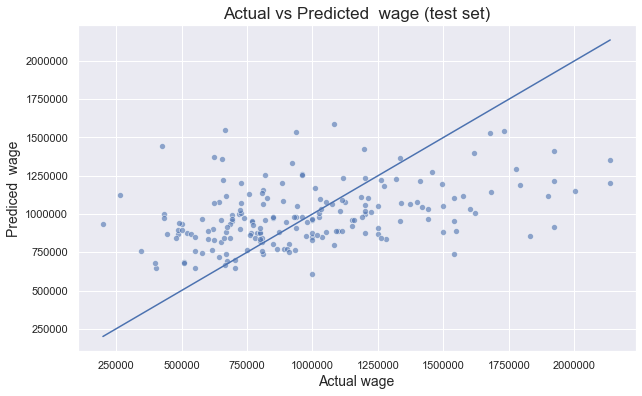

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

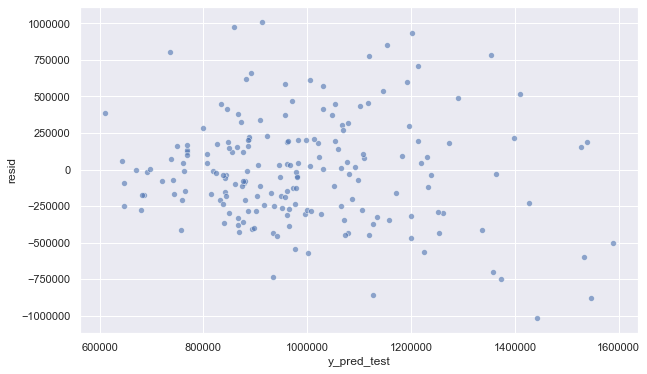

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='y_pred_test', y='resid' ,data=predictions, alpha=0.6)
plt.show()


### evaluating the Random Forests Regression model on test dataset

In [38]:
MSE_test = round(np.mean(np.square(y_test - y_pred_test)),2)
MSE_test

128259205663.1

In [39]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

358132.94

### Exercise: 
Use **Grid search** to find the optimal hyperparameters for *n_estimators* and *max_features*

## Feature Importance Measure

In [40]:
features= list(X_train.columns)
features

['hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married', 'black', 'meduc']

In [41]:
importances= RF_regressor.feature_importances_
importances

array([0.13525866, 0.20749805, 0.1325838 , 0.13509136, 0.13878708,
       0.12648903, 0.01783933, 0.02308849, 0.08336421])

In [42]:
FIM = pd.DataFrame({'Features': features , 'Feature_importance':importances})
FIM=FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
6,married,0.017839
7,black,0.023088
8,meduc,0.083364
5,age,0.126489
2,educ,0.132584
3,exper,0.135091
0,hours,0.135259
4,tenure,0.138787
1,IQ,0.207498


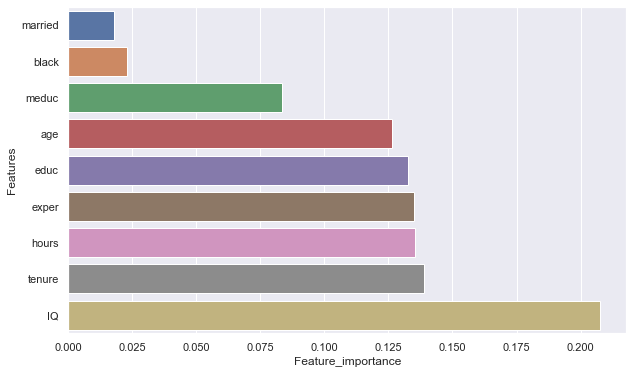

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(y='Features', x='Feature_importance', data=FIM)

---

###  Additional links:


1. Decision Trees with sklearn: https://scikit-learn.org/stable/modules/tree.html
2. Ensemble learning with sklearn: https://scikit-learn.org/stable/modules/ensemble.html
3. graphviz: this is used for Tree visualization: http://graphviz.org/
4. Out of Bag errors for random forest: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py